In [1]:
 from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\Jessy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
print(tf.__version__)

2.0.0-alpha0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

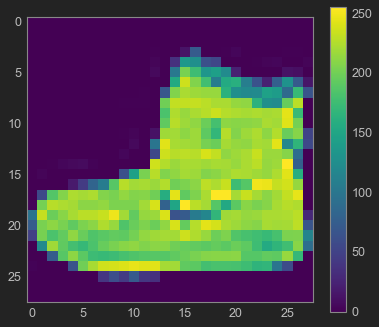

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

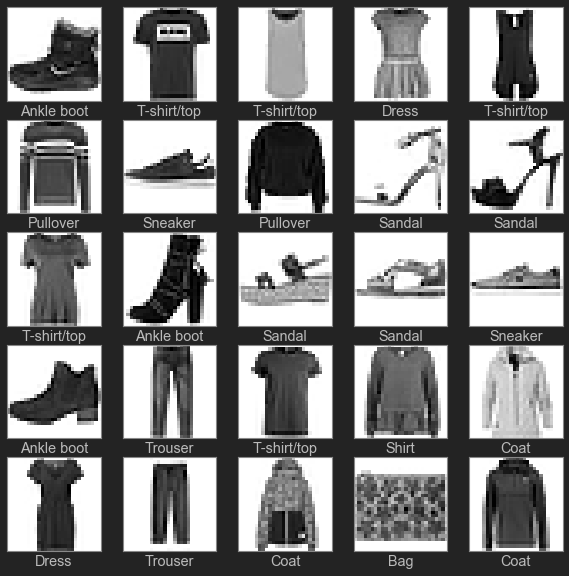

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4954 - accuracy: 0.8247
Epoch 2/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3705 - accuracy: 0.8668
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3349 - accuracy: 0.8783
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3079 - accuracy: 0.8878
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2890 - accuracy: 0.8932


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3459 - accuracy: 0.8762
Test accuracy: 0.8762


^^^ Test accuracy is lower than training accu.  This is overfitted.

In [23]:
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([1.5886766e-08, 4.7618431e-10, 2.7800420e-08, 3.1359752e-11,
       2.1849962e-07, 4.1100550e-02, 5.4538843e-05, 6.2071159e-03,
       6.3892503e-07, 9.5263690e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

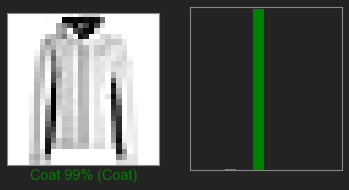

In [43]:
i = 6
plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

Plot the first X test images, their predicted label, and the true label
Color correct predictions in blue, incorrect predictions in red

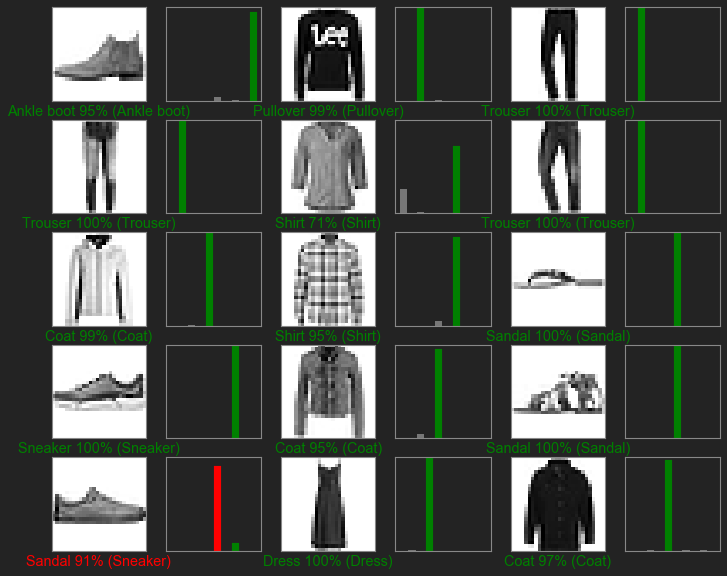

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [65]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [72]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.6373302e-07 1.7040922e-07 9.1039798e-09 4.4299324e-09 8.7860261e-09
  1.5457533e-03 1.5832157e-08 9.9810290e-01 2.1190840e-06 3.4881494e-04]]


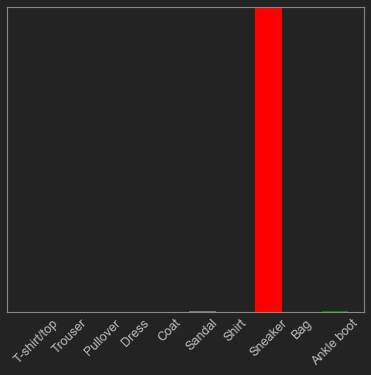

In [73]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [75]:
np.argmax(predictions_single[0])

7